In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [3]:
lvm_df = pd.read_excel('~/Desktop/Python/Life_Time_Value_test4/Test4.xlsx')
lvm_df.columns = ['Reg_date', 'c_id', 'trans_date','revenue']


In [4]:
lvm_df.info()
lvm_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Reg_date    4287 non-null   datetime64[ns]
 1   c_id        4287 non-null   int64         
 2   trans_date  4287 non-null   object        
 3   revenue     4287 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 134.1+ KB


,Reg_date,c_id,trans_date,revenue
0,2017-11-24,981511946,2018-05-22 00:00:00,4.621145
1,2017-11-24,981511946,2019-06-08 00:00:00,4.622467
2,2017-11-24,981511946,2018-05-14 00:00:00,0
3,2017-11-24,981511949,(null),(null)
4,2017-11-24,981511950,(null),(null)
...,...,...,...,...
4282,2019-05-11,981516228,(null),(null)
4283,2019-05-11,981516229,(null),(null)
4284,2019-05-11,981516230,(null),(null)
4285,2019-05-11,981516231,(null),(null)


In [5]:
lvm_df.isnull().sum()

Reg_date      0
c_id          0
trans_date    0
revenue       0
dtype: int64

In [6]:
lvm_df = lvm_df.astype(object).replace('(null)', np.nan)

In [7]:
lvm_df.isnull().sum()

Reg_date         0
c_id             0
trans_date    3037
revenue       3037
dtype: int64

In [8]:
lvm_df['c_id'].duplicated().sum()

711

In [9]:
lvm_df = lvm_df.dropna()


In [10]:
lvm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 0 to 4281
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Reg_date    1250 non-null   datetime64[ns]
 1   c_id        1250 non-null   int64         
 2   trans_date  1250 non-null   datetime64[ns]
 3   revenue     1250 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 48.8 KB


In [11]:
lvm_df['trans_date'].duplicated().sum()

797

In [12]:
lvm_df.groupby(['c_id'])['revenue'].sum()

c_id
981511946     9.243612
981511961     4.621145
981511966     4.621145
981512001     0.000000
981512008     8.308370
               ...    
981516182    18.489868
981516190     9.244934
981516196     0.000000
981516214     0.000000
981516227     0.000000
Name: revenue, Length: 539, dtype: float64

In [13]:
lvm_df['revenue'].sum()

3582.310151417849

In [14]:
lvm_df = lvm_df.replace(0, np.nan)
lvm_df.isnull().sum()

Reg_date        0
c_id            0
trans_date      0
revenue       493
dtype: int64

In [15]:
lvm_df.dropna(inplace=True)

In [16]:
lvm_df.reindex()

,Reg_date,c_id,trans_date,revenue
0,2017-11-24,981511946,2018-05-22,4.621145
1,2017-11-24,981511946,2019-06-08,4.622467
15,2017-11-28,981511961,2018-01-29,4.621145
21,2017-11-30,981511966,2018-07-14,4.621145
62,2017-12-20,981512008,2017-12-23,1.074890
...,...,...,...,...
4237,2019-05-06,981516182,2019-05-13,4.622467
4238,2019-05-06,981516182,2019-05-20,4.622467
4240,2019-05-06,981516182,2019-05-27,4.622467
4244,2019-05-06,981516190,2019-05-22,4.622467


In [17]:
lvm_df.info()
lvm_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 0 to 4246
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Reg_date    757 non-null    datetime64[ns]
 1   c_id        757 non-null    int64         
 2   trans_date  757 non-null    datetime64[ns]
 3   revenue     757 non-null    float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 29.6 KB


Reg_date      0
c_id          0
trans_date    0
revenue       0
dtype: int64

In [18]:
lvm_df =lvm_df.sort_values(['trans_date']).reset_index()

In [19]:
lvm_df.drop('index', axis=1, inplace=True)

In [20]:
lvm_df[['c_id','trans_date']].duplicated().sum()

0

In [21]:
lvm_df.describe()

,c_id,revenue
count,7.570000e+02,757.000000
mean,9.815140e+08,4.732246
std,1.159794e+03,1.919309
min,9.815119e+08,0.303965
25%,9.815132e+08,4.622467
50%,9.815139e+08,4.622467
75%,9.815149e+08,4.622467
max,9.815162e+08,37.001322


In [22]:
lvm_df.rename(columns={'trans_date':'Invoce_date'}, inplace=True)

In [23]:
lvm_df

,Reg_date,c_id,Invoce_date,revenue
0,2017-12-20,981512008,2017-12-23,1.074890
1,2017-12-20,981512008,2017-12-30,1.074890
2,2018-01-07,981512077,2018-01-07,1.074890
3,2018-01-09,981512087,2018-01-09,3.079295
4,2018-01-07,981512077,2018-01-14,1.074890
...,...,...,...,...
752,2019-03-19,981515696,2019-10-21,3.697357
753,2018-02-09,981512188,2019-10-26,4.622467
754,2018-08-24,981513281,2019-10-29,4.622467
755,2019-02-05,981515328,2019-11-01,4.622467


In [24]:
from datetime import datetime, timedelta,date


In [25]:
#Make our 6 monthes dataset
df_6m = lvm_df[lvm_df.Invoce_date>='2019-5-2'].reset_index(drop=True)

In [26]:
df_6m

,Reg_date,c_id,Invoce_date,revenue
0,2019-02-06,981515339,2019-05-02,4.622467
1,2018-10-17,981514024,2019-05-02,6.164317
2,2018-11-20,981514446,2019-05-02,4.622467
3,2019-04-05,981515878,2019-05-03,4.622467
4,2019-03-07,981515575,2019-05-03,4.622467
...,...,...,...,...
147,2019-03-19,981515696,2019-10-21,3.697357
148,2018-02-09,981512188,2019-10-26,4.622467
149,2018-08-24,981513281,2019-10-29,4.622467
150,2019-02-05,981515328,2019-11-01,4.622467


In [27]:
#Calculating days between transactions and summarry revewnue 
cltv_group = df_6m.groupby('c_id').agg({'Invoce_date':lambda date: (date.max() - date.min()).days,
                                       'revenue': lambda price: price.sum()})

In [28]:
df_6m['c_id'].nunique()

39

In [29]:
cltv_group.info()
cltv_group

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 981511946 to 981516190
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoce_date  39 non-null     int64  
 1   revenue      39 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 936.0 bytes


,Invoce_date,revenue
c_id,,
981511946,0,4.622467
981512188,182,124.806608
981512358,7,9.244934
981512404,0,1.538767
981512489,0,5.544493
981512870,102,18.489868
981513093,153,27.734802
981513114,92,7.394714
981513251,0,4.622467


In [30]:
invoice_no = df_6m.groupby('c_id')['Invoce_date'].count()

In [31]:
cltv_group["Invoice_no"] = invoice_no

In [32]:

cltv_group.columns = ['Num_days', 'Spent_money', "Num_transactions"]
cltv_group = cltv_group[['Num_days','Num_transactions', 'Spent_money']]

In [33]:
cltv_group

,Num_days,Num_transactions,Spent_money
c_id,,,
981511946,0,1,4.622467
981512188,182,27,124.806608
981512358,7,2,9.244934
981512404,0,1,1.538767
981512489,0,1,5.544493
981512870,102,4,18.489868
981513093,153,6,27.734802
981513114,92,2,7.394714
981513251,0,1,4.622467


In [34]:
#Enrich data with necessary values
cltv_group['avg_order_value'] = cltv_group['Spent_money']/cltv_group['Num_transactions']
cltv_group

/var/folders/_x/y7p2294s4t722sptmn184bvw0000gn/T/ipykernel_1756/1444550399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cltv_group['avg_order_value'] = cltv_group['Spent_money']/cltv_group['Num_transactions']


,Num_days,Num_transactions,Spent_money,avg_order_value
c_id,,,,
981511946,0,1,4.622467,4.622467
981512188,182,27,124.806608,4.622467
981512358,7,2,9.244934,4.622467
981512404,0,1,1.538767,1.538767
981512489,0,1,5.544493,5.544493
981512870,102,4,18.489868,4.622467
981513093,153,6,27.734802,4.622467
981513114,92,2,7.394714,3.697357
981513251,0,1,4.622467,4.622467


In [35]:
##Calculating purchase frequency 
purchase_frequency = sum(cltv_group['Num_transactions'])/cltv_group.shape[0]
purchase_frequency

3.8974358974358974

In [36]:
#Calculating Repeat Rate and Churn Rate
repeat_rate = cltv_group[cltv_group.Num_transactions>1].shape[0]/cltv_group.shape[0]
repeat_rate

0.5897435897435898

In [37]:
churn_rate = 1- repeat_rate
churn_rate

0.41025641025641024

In [38]:
print(purchase_frequency,repeat_rate,churn_rate)

3.8974358974358974 0.5897435897435898 0.41025641025641024


In [39]:
##Profit margin is the commonly used profitability ratio. It represents how much percentage of total sales has earned as the gain. 
##Let's assume our business has approx 10% profit on the total sale.
cltv_group['Profit_margin'] = cltv_group['Spent_money']*0.1
cltv_group


/var/folders/_x/y7p2294s4t722sptmn184bvw0000gn/T/ipykernel_1756/1927371772.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cltv_group['Profit_margin'] = cltv_group['Spent_money']*0.1


,Num_days,Num_transactions,Spent_money,avg_order_value,Profit_margin
c_id,,,,,
981511946,0,1,4.622467,4.622467,0.462247
981512188,182,27,124.806608,4.622467,12.480661
981512358,7,2,9.244934,4.622467,0.924493
981512404,0,1,1.538767,1.538767,0.153877
981512489,0,1,5.544493,5.544493,0.554449
981512870,102,4,18.489868,4.622467,1.848987
981513093,153,6,27.734802,4.622467,2.773480
981513114,92,2,7.394714,3.697357,0.739471
981513251,0,1,4.622467,4.622467,0.462247


In [40]:
#Calculating Customer value
cltv_group['CLV'] = (cltv_group['avg_order_value']*purchase_frequency)/churn_rate

/var/folders/_x/y7p2294s4t722sptmn184bvw0000gn/T/ipykernel_1756/166786276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cltv_group['CLV'] = (cltv_group['avg_order_value']*purchase_frequency)/churn_rate


In [41]:
#Customer life time value
cltv_group['Customer_life_time_v'] = cltv_group['CLV']*cltv_group['Profit_margin']

/var/folders/_x/y7p2294s4t722sptmn184bvw0000gn/T/ipykernel_1756/3770223920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cltv_group['Customer_life_time_v'] = cltv_group['CLV']*cltv_group['Profit_margin']


<AxesSubplot:>

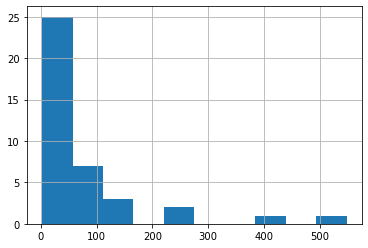

In [43]:
#Visualizing CLTV by a simple hist
cltv_group['Customer_life_time_v'].hist()

In [44]:
cltv_group['Customer_life_time_v'].describe()

count     39.000000
mean      78.244392
std      110.663550
min        2.249412
25%       20.298841
50%       40.597682
75%       81.195363
max      548.068701
Name: Customer_life_time_v, dtype: float64

In [45]:
mask = cltv_group['Customer_life_time_v']<122

In [46]:
cltv_group_without_outlayers = cltv_group[mask]
cltv_group_without_outlayers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 981511946 to 981516190
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Num_days              34 non-null     int64  
 1   Num_transactions      34 non-null     int64  
 2   Spent_money           34 non-null     float64
 3   avg_order_value       34 non-null     float64
 4   Profit_margin         34 non-null     float64
 5   CLV                   34 non-null     float64
 6   Customer_life_time_v  34 non-null     float64
dtypes: float64(5), int64(2)
memory usage: 2.1 KB


In [47]:

cltv_group_without_outlayers.mean()


Num_days                27.558824
Num_transactions         2.176471
Spent_money              9.734757
avg_order_value          4.567026
Profit_margin            0.973476
CLV                     43.386750
Customer_life_time_v    43.182991
dtype: float64

count     34.000000
mean      43.182991
std       31.407216
min        2.249412
25%       20.298841
50%       30.027763
75%       58.933037
max      121.793045
Name: Customer_life_time_v, dtype: float64

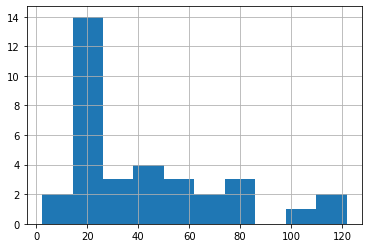

In [48]:
cltv_group_without_outlayers['Customer_life_time_v'].hist()
cltv_group_without_outlayers['Customer_life_time_v'].describe()

In [ ]:
#So, even here i can see an outlires, I guess we have to high std, which could have impact, let's see them closer

In [49]:
ended_cltv_crowd_mask = cltv_group_without_outlayers['Customer_life_time_v']<90
ended_cltv_crowd_df = cltv_group_without_outlayers.loc[ended_cltv_crowd_mask]


In [50]:
ended_cltv_crowd_df['Customer_life_time_v'].describe()


count    31.000000
mean     36.150114
std      22.332880
min       2.249412
25%      20.298841
50%      25.973850
75%      46.994482
max      81.195363
Name: Customer_life_time_v, dtype: float64

<AxesSubplot:>

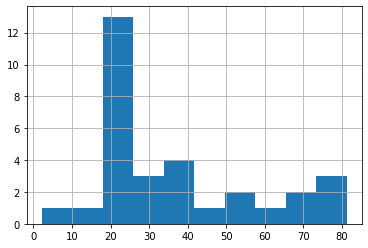

In [51]:
ended_cltv_crowd_df['Customer_life_time_v'].hist()

In [52]:
ended_cltv_crowd_df.describe()

,Num_days,Num_transactions,Spent_money,avg_order_value,Profit_margin,CLV,Customer_life_time_v
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,17.387097,1.935484,8.410211,4.472134,0.841021,42.485276,36.150114
std,27.636543,1.181397,4.934463,0.975596,0.493446,9.268158,22.332880
min,0.000000,1.000000,1.538767,1.538767,0.153877,14.618282,2.249412
25%,0.000000,1.000000,4.622467,4.490400,0.462247,42.658804,20.298841
50%,0.000000,1.000000,7.086344,4.622467,0.708634,43.913436,25.973850
75%,21.000000,2.500000,11.704185,4.622467,1.170419,43.913436,46.994482
max,102.000000,4.000000,18.489868,7.397797,1.848987,70.279075,81.195363


In [ ]:
##Generaly we have taken a picture of our avarage customer and had to say that his avarage CLTV equal to 36$
#He usually does 2 purchases every 18 days


In [53]:
#There are our main outlires, not so many
mask = cltv_group['Customer_life_time_v']>123
cltv_group__outlayers = cltv_group[mask]
cltv_group__outlayers

,Num_days,Num_transactions,Spent_money,avg_order_value,Profit_margin,CLV,Customer_life_time_v
c_id,,,,,,,
981512188,182,27,124.806608,4.622467,12.480661,43.913436,548.068701
981513732,140,21,97.071806,4.622467,9.707181,43.913436,426.275656
981515339,126,11,50.847137,4.622467,5.084714,43.913436,223.287248
981515824,50,8,36.979736,4.622467,3.697974,43.913436,162.390726
981516013,94,11,50.847137,4.622467,5.084714,43.913436,223.287248


<AxesSubplot:>

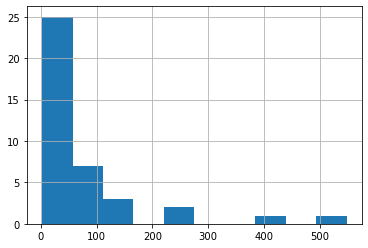

In [54]:

cltv_group['Customer_life_time_v'].hist()

In [ ]:
#in conclusion i want to point that we have evaluated our Customer life time value, build a visualization 
#and even make a picture of our avarage customer in period of last 6 monthes